In [27]:
# Load the DifferentialEquations and Plots modules

using DifferentialEquations
using Plots
gr()

Plots.GRBackend()

# How to define the problem

In this example we will solve the equation

\begin{equation}
    \frac{du}{dt} = f(u,p,t)
\end{equation}

on the time interval $t\in [0,1]$, where $f(u,p,t) = \alpha u$. We know by Calculus that the solution to this equation is $u(t) = u_0\exp(\alpha t)$.

The general workflow is to

* define the problem
* solve the problem
* analyze the solution.

## Step 1: Define the Problem
To solve this problem numerically, we defint the problem type by giving it the equation, the initial condition, and the timespan to solve over:

In [51]:
f(u,p,t) = 1.01*u # Solving du/dt = 1.01 u(t)
u0 = 1/2 # The initial condition, u(0) = 1/2
tspan = (0.0, 3.0) # for times 0.0 <= t <= 1.0

prob = ODEProblem(f, u0, tspan) # Define the problem

ODEProblem with uType Float64 and tType Float64. In-place: false
timespan: (0.0, 3.0)
u0: 0.5

## Step 2: Solve the Problem
After defining the problem, you solve it using "solve". For extra parameters to the "solve" function see the page at:

http://docs.juliadiffeq.org/latest/tutorials/ode_example.html

In [52]:
sol = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8);

## Step 3: Plot the Solution
We can plot the solution object returned by "solve" directly using the "plot" function of the Plots module

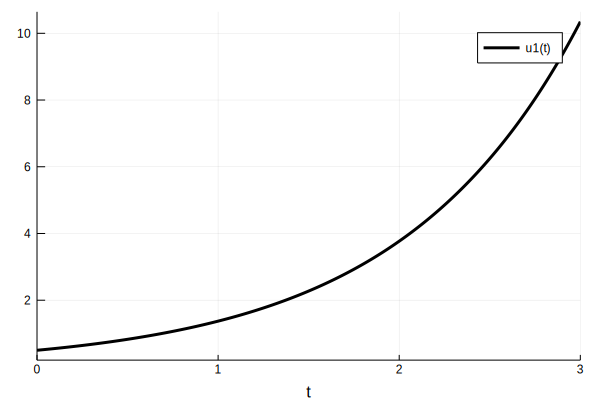

In [53]:
plot(sol, lw=3, color=:black)

## Check the accuracy of the solution
We can, in this case, compare how well the numerical solution returned by "solve" compares to the exact solution to the differential equation with the given initial condition. The exact solution is:

\begin{equation}
    u(t) = \frac{1}{2} e^{1.01 t}
\end{equation}

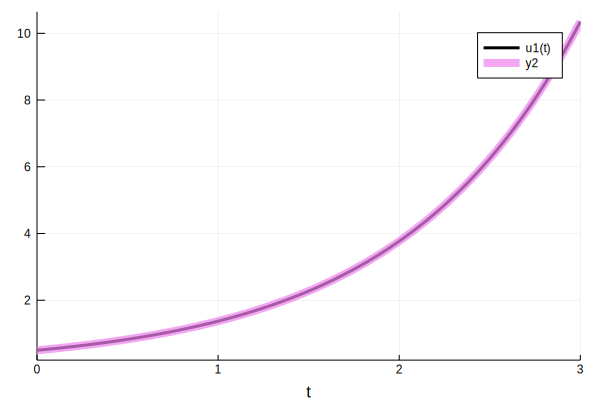

In [54]:
u(t) = 0.5*exp(1.01*t)

# sol.t contains the array of time points of the object returned by "solve"
plot!(sol.t, t->u(t), lw=8, alpha=0.7, color="violet")

## Solving a System of ODE's
To solve the system of ODE's

\begin{align}
    x_1'(t) &= x_1(t) + 3x_2(t)\\
    x_2'(t) &= 4x_1(t) + 2x_2(t)
\end{align}

with initial conditions $x_1(0) = -1,\; x_2(0) = 2$, we set up a vectors:

$\pmb{dx} = 
\begin{bmatrix}
    x_1'(t)\\
    x_2'(t)
\end{bmatrix},\quad
\pmb{x} =
\begin{bmatrix}
    x_1(t)\\
    x_2(t)
\end{bmatrix},\text{  and  }
\pmb{x_0} =
\begin{bmatrix}
    x_1(0)\\
    x_2(0)
\end{bmatrix}
$

In [73]:
function system(dx,x,p,t)
    dx[1] = x[1] + 3*x[2]
    dx[2] = 4*x[1] + 2*x[2]
end

x0 = [-1.0, 2.0]
tspan = (0.0, 0.2)

(0.0, 0.2)

In [74]:
prob = ODEProblem(system,x0,tspan);

In [94]:
sol = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8);

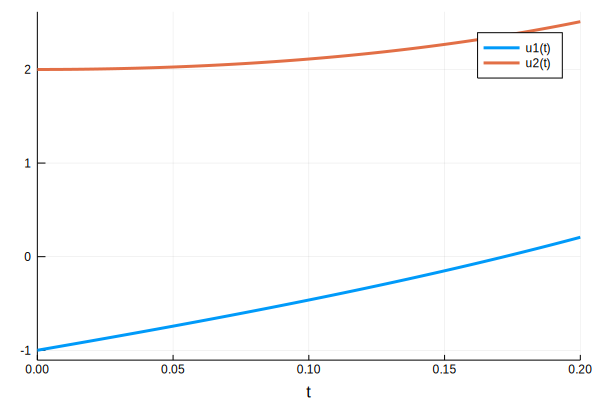

In [96]:
plot(sol)